### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2023 ###

# Airline Crew Scheduling Optimization  #
#### Yani Lan (ylan38@wisc.edu)


## 1. Introduction ##

### 1.1 Project Overview ##

The following Airline Crew Scheduling project examines a fictitious Airline Comapny, which is trying to optimize its flights and  roster operations with multiple objectives under constraints using mixed integer programing and optimizing the scheduling plans as a multi-objective problem. The problem's objectives in this project includes:

a.Maximum number of flights that satisfy flight composition requirements (This objective makes sure that airline company can have more available flights to use or on call)

b.Minimum flight taken times for each crew member (Also known as number of Deadhead).

c.Minimum backup qualification usage.
(Airline company will prior crew member to perform their main qualifications rather than their backup qualifications to make best use of the crew members' highest qualification. For example, a captain with first officer backup qualification should not perform first officer role if there are other first officers available.)

d.Minimum total cost of duty.

I plan to initially construct a basic mixed integer programming model to optimize objectives a through c. Following this, I will integrate the concept of duty into the model and address the optimization problem to meet objectives a, d, b, and c according to priority using setObjectiveN function.

The general structure for the project is as follows: Firstly, I will provide some investigation into the type of problems I am solving and supply information on the data associated with my models. Next, I will formalize all my models in their general mathematical notation and provide all data, objective functions and constraints. 

### 1.2 Background, Airline Scheduling ###

#### 1.2.1 Airline Scheduling

As is well known that a commercial airline flight must meet specific conditions before it can take off. These conditions include national laws and regulations, international conventions, government administrative regulations, and the airline's own policy interests. In some countries, trade unions also impose regulations on crew welfare preferences. All these conditions are among the most important factors ensuring flight safety and the quality of passenger service. Broadly speaking, the crew includes captain, flight officers, and deadhead. The so-called crew scheduling problem involves constructing a specific time period of crew schedules, including when and where each crew member is and on which sector they perform and what type of tasks to perform. Crew scheduling has been one of the earliest examples of operations research applications. The aim of this topic is to establish a linear optimization model that clearly expresses constraints such as flight time, duty time, and rest time, and directly assigns sectors (flights) to crew members.

In the arline crew scheduling problem, my topic is specifically about crew. Each crew member has a fixed base and possesses one and only one primary qualification, but may also have a secondary qualification. Crew scheduling should prioritize arranging the primary qualification but can also schedule the secondary qualification. In addition to performing flight tasks, crew members can also undertake deadheading tasks, which involve crew members traveling on regular sectors from one airport to another sector. Crew members carry out sector task, several of which are connected to form a duty.

#### 1.2.2 The Airline Crew Scheduling Problem

Modeling a companies airline scheduling method as an optimization problem under different conditions can also be done through the use of Mixed Integer Programing in the form of a 0-1 Integer Programming . 
The 0-1 Integer Programming problem is a special type of optimization problem that falls under the broader category of mathematical programming or linear programming. In a 0-1 integer program, decision variables are restricted to binary values — 0 or 1. One of the advantages of 0-1 integer programming problems lies in the fact that they are often NP-hard, meaning that there is no known algorithm capable of solving all instances of the problem efficiently (in polynomial time). This has led to the development of various heuristic and approximation algorithms, such as branch-and-bound and cutting planes, which can find good solutions in a reasonable amount of time for many practical problems.

#### 1.2.3 Concepts of Flight

Flight refers to a takeoff and landing of an aircraft. In my projec, I assume that each flight is unique, although in reality flight numbers may repeat on a daily or weekly basis. Also Notes that when flights are used for crew scheduling, they are also called leg or sector.(Flighta and Sector in my project share the same meaning)
1. Each flight has a given departure date and time,arrival date and time.
2. Each flight has a given departure and arrival airport.
3. Each flight has a given minimum crew qualification configuration (Composition), which is described in the format C<number> F<number>, where C<number> is the number of captains and F<number> is the number of first officer captains. A flight can only take off if it meets the minimum crew qualification configuration. My project assumes that there is only one aircraft model and one configuration. The actual situation may be different.
    
Figure1 gives a clear instruction on how to understand C<number> F<number>.

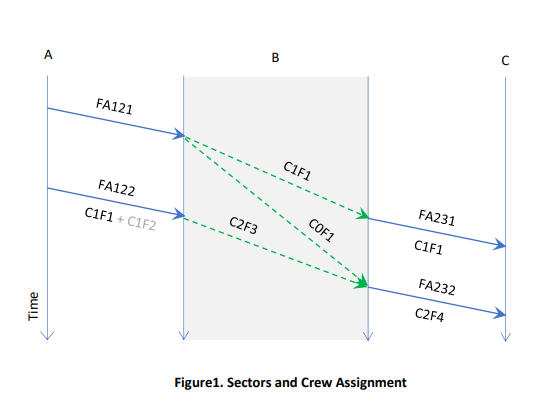

#### 1.2.4 Concepts of Duty
  
A duty consists of a series of sector (flight or boarding) and the gap time, which is equivalent to one work trip. The following constraints are satisfied between flight sectors on the same duty:
1. The arrival airport of the previous sector is the same as the departure airport of the next sector.
2. The interval between the arrival of the previous sector and the departure of the next sector must satisfy the minimum connection time constraint.
3. Each sector in the same duty must take off on the same day, but the arrival time is not subject to this restriction. According to the departure time, we say that this duty belongs to that day.
The connecting time between sector counts as duty time but not as sector time. The duty start time is calculated from the departure time of the first flight of the day, and the end time is calculated from the arrival time of the last flight. Therefore, the duty end time does not need to be on the same day as the duty start time.

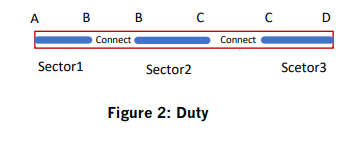

#### 1.2.5 Concepts of Deadhead

In addition to performing flight tasks, crew members can also perform deadhead tasks. Deadhead refers to the crew taking a normal flight to ferry from one airport to another to perform flight missions.There are generally restrictions on the number of passengers on board.

### 1.3 Modeling Badger Airline Company ###

#### 1.3.1 General
For this problem, I will imagine I am head of operations for the renowned - and fictitious - Badger Airline Company (BAC). Because I am terrific at my job, my Madison, Wisconsin-based aircraft manufacturing company has secured an exclusive license to be the sole provider of airline crew scheduling algorithm. 

#### 1.3.2 Model Assumptions/Simplifications
Along with each model are a corresponding set of assumptions and simplifications I have made as the model creator and software developer. These design choices may be nonviable for a real-world airline crew scheduling problem but will help ensure I have enough time to solve the problem independently.

1. Crew members can be combined in any way;
2. Flights that cannot take off because they cannot meet the minimum crew qualification configuration are allowed in the project;
3. Flights that do not meet the minimum crew qualifications cannot be assigned any crew members;
4. Crew members can take the ferry, that is, the actual crew configuration can exceed the minimum configuration requirements. The flight time of the crew members will be included in the duty time, but not in the flight time.

| Parameter | Value |
|:--------:|:--------:|
| MinCT         |    45      |
| MaxBlk        |    600      |
| MaxDP         |   720      |
| MinR         |    640      |


### 1.4 Data ###
Data in this model comes from shumo.com which is a website that includes popular mathematical modeling problems and related datasets for reference. The datasets I used in the project were originally provided for reference in solving airline scheduling related problems. In my project, I will be using two datasets which are dataset Crew and Dataset Flight.

#### 1.4.1 Dataset Crew
<!-- Start Distance Table -->
<table>
<!-- Column Headers     -->
    <th></th>
    <th>EmpNo</th>
    <th>Captain</th>
    <th>FirstOfficer</th>
    <th>Deadhead</th>
    <th>Base</th>
    <th>DutyCostPerHour</th>
    <th>ParingCostPerHour</th>
    
<!-- Row Headers/Data -->
  <tr>
    <th>0</th>
    <td>A0001</td>
    <td>Y</td>
    <td> </td>
    <td>Y</td>
    <td>NKX</td>
    <td>680</td>  
    <td>20</td>  
  </tr>
  <tr>
    <th>1</th>
    <td>A0002</td>
    <td>Y</td>
    <td> </td>
    <td>Y</td>
    <td>NKX</td>
    <td>680</td>  
    <td>20</td>  
  </tr>
  <tr>
    <th>2</th>
    <td>A0003</td>
    <td>Y</td>
    <td> </td>
    <td>Y</td>
    <td>NKX</td>
    <td>680</td>  
    <td>20</td> 
  </tr>
  <tr>
    <th>3</th>
    <td>A0004</td>
    <td>Y</td>
    <td> </td>
    <td>Y</td>
    <td>NKX</td>
    <td>680</td>  
    <td>20</td> 
  </tr>
  <tr>
    <th>4</th>
    <td>A0005</td>
    <td>Y</td>
    <td>Y</td>
    <td>Y</td>
    <td>NKX</td>
    <td>640</td>  
    <td>20</td> 
</table>
<br>
<center>
    <i>Figure 3: First 3 row of Dataset Crew<i>
<center>
<br>
<!-- Start Address Table -->
<table>
<!-- Column Headers     -->
    <th></th>
    <th>Type</th>
    <th>Definition</th>
<!-- Row Headers/Data -->
  <tr>
    <th>EmpNo</th>
    <td>String</td>
    <td>Employee Number</td>
  </tr>
  <tr>
    <th>Captain</th>
    <td>String</td>
    <td>Is captain or not</td> 
  </tr>
  <tr>
    <th>FirstOfficer</th>
    <td>String</td>
    <td>Is firstofficer or not</td>
  </tr>
  <tr>
    <th>Deadhead</th>
    <td>String</td>
    <td>Eligible for Deadhead or not</td>
  </tr>
  <tr>
    <th>Base</th>
    <td>String</td>
    <td>Base airport</td>
  </tr>
  <tr>
    <th>DutyCostPerHour</th>
    <td>Integer</td>
    <td>Duty Cost Per Hour</td>
  </tr>
  <tr>
    <th>PairingCostPerHour</th>
    <td>Integer</td>
    <td>Pairing Cost Per Hour</td>
  </tr>
</table>
<br>
 <center>
    <i>Figure 4: Schema.<i>
 <center>
<br>

#### 1.4.2 Dataset Flight
    
<!-- Start Distance Table -->
<table>
<!-- Column Headers     -->
    <th></th>
    <th>FltNum</th>
    <th>DptrDate</th>
    <th>DptrTime</th>
    <th>DptrStn</th>
    <th>ArrvDate</th>
    <th>ArrvTime</th>
    <th>ArrvStn</th>
    <th>Comp</th>
    
<!-- Row Headers/Data -->
  <tr>
    <th>0</th>
    <td>FA2</td>
    <td>8/12/2021</td>
    <td>10:10</td>
    <td>PGX</td>
    <td>8/12/2021</td>
    <td>11:40</td>
    <td>NKX</td>  
    <td>C1F1</td> 
  </tr>
  <tr>
    <th>1</th>
    <td>FA3</td>
    <td>8/12/2021</td>
    <td>10:25</td>
    <td>PGX</td>
    <td>8/12/2021</td>
    <td>11:40</td>
    <td>NKX</td>  
    <td>C1F1</td> 
  </tr>
  <tr>
    <th>2</th>
    <td>FA680</td>
    <td>8/11/2021</td>
    <td>8:00</td>
    <td>NKX</td>
    <td>8/11/2021</td>
    <td>9:30</td>
    <td>PGX</td>  
    <td>C1F1</td> 
  </tr>
  <tr>
    <th>3</th>
    <td>FA680</td>
    <td>8/12/2021</td>
    <td>8:00</td>
    <td>NKX</td>
    <td>8/12/2021</td>
    <td>9:30</td>
    <td>PGX</td>  
    <td>C1F1</td> 
  </tr>
  <tr>
    <th>4</th>
    <td>FA680</td>
    <td>8/13/2021</td>
    <td>8:00</td>
    <td>NKX</td>
    <td>8/13/2021</td>
    <td>9:30</td>
    <td>PGX</td>  
    <td>C1F1</td> 
</table>
     
<br>
 <center><i>Figure 5: First 5 rows of Dataset Flight.</i></center>
<br>
    
<!-- Start Address Table -->
<table>
<!-- Column Headers     -->
    <th></th>
    <th>Type</th>
    <th>Definition</th>
<!-- Row Headers/Data -->
  <tr>
    <th>FltNum</th>
    <td>String</td>
    <td>Flight Number</td>
  </tr>
  <tr>
    <th>DptrDate</th>
    <td>DateTime</td>
    <td>Departure Date</td> 
  </tr>
  <tr>
    <th>DptrTime</th>
    <td>DateTime</td>
    <td>Departure Time</td>
  </tr>
  <tr>
    <th>DptrStn</th>
    <td>String</td>
    <td>Departure Station</td>
  </tr>
  <tr>
    <th>ArrvDate</th>
    <td>String</td>
    <td>Arrival Date</td>
  </tr>
  <tr>
    <th>ArrvTime</th>
    <td>DateTime</td>
    <td>Arrival Time</td>
  </tr>
  <tr>
    <th>ArrvStn</th>
    <td>String</td>
    <td>Arrival Station</td>
  </tr>
  <tr>
    <th>Comp</th>
    <td>String</td>
    <td>Composition of the flight</td>
</table>

<br>
 <center><i>Figure 6: Schema.</i></center>
<br>


## 2 Mixed Integer Programming Model##


## 2.1 Basic model 

The first model we are looking at is an example of a <i>Mixed Integer Programming</i> The priorities of the optimization objectives are as follows: maximizing the number of flights arranged for the crew; minimizing the total number of flights taken (number of deadhead), and minimizing the backup qualification usage. For this problem, considering the highest priority of maximizing the number of sectors that meet requirements, and also considering the introduction of many objective functions subsequently, we establish a two-stage mixed integer programming model. In the first stage, the objective function with the highest priority of maximizing the number of flights arranged for the crew will be solved, the result will be added to the second-stage as constraints to address the rest of objectives.

| Notation | Description |
|:--------:|:----------:|
| <i>i,j<i> | <i>Flight Number<i> |
| <i>t<i> | <i>Date Number<i> |
| <i>k<i> | <i>Crew Number<i> |
| <i>a<i> | <i>Airport Number<i> |
| <i>C<i> | <i>Crew Set, k ∈ C<i> |
| <i>D<i> | <i>Date Set, t ∈ D<i> |
| <i>F<i> | <i>Sector Set, i,j ∈ D<i> |
| <i>APT<i> | <i>Airport Set, a,p ∈ AP<i> |
| <i>Base<i> | <i>Base Set<i> |
| <i>C<sub>1</sub><i> | <i>Captain (Not eligible for first officer)<i> |
| <i>C<sub>2</sub><i> | <i>Captain (Eligible for first officer)<i> |
| <i>C<sub>3</sub><i> | <i>First Oficer<i> |
| <i>F<sup>a</sup><sub>p</sub><i> | <i>Sector that arrive at airport a,p ∈ APT<i> |
| <i>F<sup>l</sup><sub>p</sub><i> | <i>Sector that leave(take off) airport a,p ∈ APT <i>|
|<i> F<sub>t</sub><i> | <i>Sector that take off date is t  t ∈ T<i> |
| <i>(i,j)<i> | <i>Combination of sector i,j<i>|
| <i>FF<i> | <i>Set of sector combination i,j ∈ FF<i> |
| <i>b<sub>k</sub><i> | <i>Base of Crew number k<i>|
| <i>date<sub>i</sub><i> | <i>Take off date of sector k<i> |
| <i>dutycost<sub>i</sub><i>| <i>Duty cost of Crew number i<i> |
| <i>T<sup>l</sup><sub>i</sub><i> | <i>Take off time of sector i<i> |
| <i>T<sup>a</sup><sub>i</sub><i> | <i>Arrival time of sector i<i> |
| <i>T<i> | <i>Time period<i> |
| <i>CNum<sub>i</sub>, FNum<sub>i</sub><i> | <i>The composition requirement for captain and first officer of sector i<i>|
| <i>MinCT<i> | <i>Minimum connection time between two sectors<i> |
| <i>MaxBlk<i> | <i>Maximum flight time of one duty<i> |
| <i>MaxDP<i>      | <i>Maximum timme period of one duty<i>     |
| <i>MinR<i>    | <i>Minimum vacation time period betwee duties<i> |
| <i>MaxDH<i>    | <i>Maximum number of deadhead per sector<i> |
| <i>µ<i>       | <i>weight of objectives<i>   |

| Binary Variables  |Description                         |
|:------------------:|:----------------------:|
|<i>x<sub>ik</sub><sup>c</sup> <i>| <i>If crew member k works as the captain, then 1, otherwise 0<i> |
|<i>x<sub>ik</sub><sup>f</sup><i>  | <i>If crew member k works as the first officer, then 1, otherwise 0<i> |
|<i>x<sub>ik</sub><sup>d</sup><i> | <i>If crew member k has a deadhead task on flight i, then 1, otherwise 0<i> |
| <i>z<sub>i</sub><i> |<i> If flight i is assigned to a closed crew configuration, then 1, otherwise 0<i> |
|<i>y<sub>ijk</sub><i>| <i>If crew member k works on flight i and then flight j, then 1, otherwise 0 <i>|
|<i>v<sub>ijk</sub><i>  | <i>If crew member k finishes a duty with flight i and starts the next duty with flight j, then 1, otherwise 0<i> |
|<i>w<sub>ijk</sub><i>| <i>If crew member k finishes a task with flight i and starts the next task with flight j, then 1, otherwise 0 <i>|
|<i>u<sub>ijk</sub><i>| <i>If crew member k starts the current task with flight i and ends it with flight j, then 1, otherwise 0<i> |
|<i>r<sub>ik</sub><sup>s</sup><i>, <i>r<sub>ik</sub><sup>f</sup><i>|<i> If crew member k starts (ends) flight i as the beginning (end) of a task, then 1, otherwise 0<i> |
|<i>d<sub>ik</sub><sup>s</sup><i>, <i>d<sub>ik</sub><sup>f</sup><i>| <i>If crew member k starts (ends) flight i as the beginning (end) of a duty, then 1, otherwise 0<i> |

Integer Variable | Description 
|:------------------:|:----------------------:|
<i>FNum<i> | <i>Total number of flights<i>
<i>MaxDT, MinDT<i> | <i>Maximum/Minimum duration of duty time<i>
<i>MaxRT, MinRT<i> | <i>Maximum/Minimum duration of rest time<i>


### 2.1.1 First Stage
### Objective Function

The highest priority objective is to maximize the number of flight that satisfy the crew configuration. The variable zi indicates whether flight i meets the crew configuration; if it does, z i is set to 1. This objective function is denoted as f1, as shown below:

\begin{equation*}
\max{f_1}=\sum _{i\in F} z_{j}
\end{equation*}

### Constraints
<i>Constraint 1</i>: To ensure that crew member k only perform their own task durng sector i,we have

\begin{equation*}
x^{c}_{ik}+ x^{f}_{ik}+x^{d}_{ik}\ \geqslant \ 1 ,\ \forall i\in F,\ \forall k\in C.
\end{equation*}


<i>Constraint 2</i>: The variable <i>z<sub>i</i> is a 0-1 variable, indicating whether sector i meets the flight crew configuration; if so, it takes the value of 1, ensuring that the number of captains and first officers for the normal takeoff of sector i meets the configuration requirements.

\begin{equation*}
\sum _{k\in C}x^{c}_{ik} = z_{i}CNum_{i},\ \forall i\in F \\
\sum _{k\in C}x^{f}_{ik} = z_{i}FNum_{i},\ \forall i\in F
\end{equation*}

<i>CNum<sub>i</sub></i> and <i>FNum<sub>i</sub></i> refer to the composition of captain and first oficer for sector i. Constraint 2 ensure that the crew number satisfies composition requirement when <i>z<sub>i</i>=1.
    
<i>Constraint 3</i>: We need to ensure that the tasks performed by any crew member <i>k</i> are in accordance with their qualifications. The set C<sub>3</sub> refers to crew members <i>k</i>  who only have the first officer qualifications. Meanwhile, we also ensure that crew members 
k who only have captain qualifications in set C1 cannot perform the duties of a first officer's.

\begin{equation*}
x^{c}_{ik}=0,\ \forall i\in F,\ \forall k\in C_{3},\\
x^{f}_{ik}=0,\ \forall i\in F,\ \forall k\in C_{1}   
\end{equation*}
    
<i>Constraint 4</i>: We need to ensure that flights that do not meet the minimum crew configuration cannot be assigned any crew members (which means that for any flight, if there are crew members performing tasks, indicates that the flight complies with the configuration requirements.)

\begin{equation*}
\sum _{k\in C}x_{ik}^{c}+x_{ik}^f+x_{ik}^d \ \geqslant \ Mz_{i},\ \forall i\in F
\end{equation*}

M is big positive number,the above constraint ensures that when <i>z<sub>i</i>=0, there is no crew member performing tasks on flight i.

<i>Constraint 5</i>: Variable <i>y<i><sub>ijk</sub></i> is binary variable that tells whether for crew member k if there exists connection between flight i and flight j.
    
\begin{equation*}
y_{ijk}=0,\ \forall (i,j)\in FF_{1},\ \forall k\in C,
\end{equation*}   
    
<i>FF<sub>1</sub></i> is the set of combination of flight.For <i>∀(i,j)∈FF<sub>1</sub></i>,the arrival airport of sector j is not the same with the airport of sector i. Therefore there is no connection between sector i and sector j.

<i>Constraint 6</i>: We need to ensure that minimum connection time between two sector is no less than <i>MinCT<i/> minutes.
    
\begin{equation*}
y_{ijk}=0,\ \forall (i,j)\in FF_{2},\ \forall k\in C,
\end{equation*}   
    
For <i>∀(i,j)∈FF<sub>2</sub></i>,if $$ T^{l}_{i}-T^{a}_{i} <= \text{MinCT}  $$ ( the connection time between the arrival time of sector i and departure time of sector j does not satisfy MinCT constraint, which indicates there is no connection between sector i and sector j.)
 
 <i>Constraint 7</i>: Variable <i>r<sup>s</sup><sub>ik<sub></i> is binary variable that tells whether flight i is the begining task of task cycle for crew member k, <i>r<sup>s</sup><sub>ik<sub></i> =1 if crew member k departure from his/her base and return to the base eventually.
    
\begin{equation*}
r^s_{ik}=0,\ \forall i\in F / F^l_{b_{k}},\ \forall k\in C,\\
r^f_{ik}=0,\ \forall i\in F / F^a_{b_{k}},\ \forall k\in C,
\end{equation*}  
    
<i>Constraint 8</i>: To ensure that every crew member k has at most one begining sector and a corresponding ending sector j.

\begin{equation*}
r^s_{ik}\ \geqslant 1,\ \forall k\in C,
r^f_{ik}-r^f_{jk}=0,
\end{equation*}

<i>Constraint 9</i>: We need to ensure that for every sector,the number of crew member who arrive or start their tasks are the same as the number they leave or end their tasks.
    
\begin{equation*}
\sum _{j\in F}y_{ijk} + r^f_{ik}= \sum _{j\in F}y_{jik} + r^s_{ik},\ \forall k\in C\\,\ \forall i\in F, 
\end{equation*}   

The constraint ensures that if a crew member arrive at one sector, he/she has to departure or leave from the sector.
    
<i>Constraint 10</i>: We need to ensure that if a sector satisfy composition requirement, then the sector 

\begin{equation*}
(1-(\sum_{j\in F}y_{ijk}+r^{s}_{ik}+r_{i}k^f))\ \geqslant \ M(1-(x_{ik}^c+x_{ik}^f+x_{ik}^d)),\ \forall i\in F,\ \forall k\in C,\\
x_{ik}^c+x_{ik}^f+x_{ik}^d\ \leq\sum_{j\in F}y_{ijk}+r^{f}_{ik} ,\ \forall i\in F,\ \forall k\in C
\end{equation*}
    
In the above constraint, there exists crew member that has connection sector before or after and put this sector as begining sector or end sector if <i>x<sup>c</sup><sub>ik</sub>+x<sup>f</sup><sub>ik</sub>+x<sup>d</sup><sub>ik</sub>=1</i>. There will be no connection sector before or after and the sector will not be treated as begining nor ending sector if <i>x<sup>c</sup><sub>ik</sub>+x<sup>f</sup><sub>ik</sub>+x<sup>d</sup><sub>ik</sub>=0</i>


Through modeling the above objection function of maximizing number of flights that satisfy composition requirement.We could solve the model with Gurobi software.

In [1]:
import gurobipy as gp
from gurobipy import *
from datapreprocess import dataloader

In [2]:
data_loader1 =dataloader('Crew.csv', 'Flight.csv')
data_loader1.load()

Rows...(0/206)
Rows...(100/206)
Rows...(200/206)
Loading... (10000/42436)
Loading... (20000/42436)
Loading... (30000/42436)
Loading... (40000/42436)
Loading... (10000/42436)
Loading... (20000/42436)
Loading... (30000/42436)
Loading... (40000/42436)
Loading... (10000/42436)
Loading... (20000/42436)
Loading... (30000/42436)
Loading... (40000/42436)
Rows...(0/206)
Rows...(100/206)
Rows...(200/206)


In [3]:
basic_f1=gp.Model('m1')
M=100000
z=basic_f1.addVars(data_loader1.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=basic_f1.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=basic_f1.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=basic_f1.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=basic_f1.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=basic_f1.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='r_jkfin')

y_ijk=basic_f1.addVars(data_loader1.F,data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='y_ijk')


basic_f1.modelsense=GRB.MINIMIZE

basic_f1.setObjective(-z.sum())
#constraints on captain, first officer and deadhead
basic_f1.addConstrs(x_ikfo[i,k]==0 for i in data_loader1.F for k in data_loader1.C1 )
basic_f1.addConstrs(x_ikcap[i,k]==0 for i in data_loader1.F for k in data_loader1.C3 )
basic_f1.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader1.F for k in data_loader1.C)

#constraint 4
basic_f1.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader1.C)<=M*(z[i]) for i in data_loader1.F)

#constraint 2
basic_f1.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader1.F )
basic_f1.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader1.F )
basic_f1.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader1.C) for j in data_loader1.F)

basic_f1.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader1.FF for k in data_loader1.C)

basic_f1.addConstrs(r_jkfin[j,k]== 0 for j in data_loader1.nonF_arrive_base[0] for k in data_loader1.C)
basic_f1.addConstrs(r_iksta[i,k]== 0 for i in data_loader1.nonF_leave_base[0] for k in data_loader1.C)

basic_f1.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader1.F_leave_base[0] )<=1  for k in data_loader1.C)
basic_f1.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader1.F_arrive_base[0] )-gp.quicksum(r_iksta[i,k] for i in data_loader1.F_leave_base[0] ) == 0 for k in data_loader1.C)

basic_f1.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader1.F for k in data_loader1.C)
basic_f1.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader1.F for k in data_loader1.C)

basic_f1.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader1.F for k in data_loader1.C)
basic_f1.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader1.F for k in data_loader1.C)

basic_f1.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-02
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 792485 rows, 912992 columns and 5336864 nonzeros
Model fingerprint: 0xd8f02603
Variable types: 0 continuous, 912992 integer (912992 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Found heuristic solution: objective 0.0000000
Presolve removed 774198 rows and 784697 columns
Presolve time: 2.26s
Presolved: 18287 rows, 128295 columns, 504072 nonzeros
Variable types: 0 continuous, 128295 integer (128295 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   17360   -2.6976093e+01   0.000000e+00   1.5

### 2.1.2 Second Stage

With maximum number of flights that satify composition requirements through solving the first stage model, we could define the the value as MaxFlight and treat it as a constraint in building the second-stage model.

### Objective
For minimum total number of deadhead,xik dh refers to: if crew member k performing deadhead in sector i, xik dh=1.

\begin{equation*}
\max{f_2}=\sum _{k\in C} x^{d}_{ik}
\end{equation*}
 
For minimum backup qualification usage, x_ik fo represents whether crew member k perform first officer role in sector i. If yes, the x_ik fo=1. C2 refers to the set of crew member that are eligible to perform first officer role.

\begin{equation*}
\max{f_3}=\sum _{k\in C_{2}} x^{f}_{ik}
\end{equation*}

Since the objective in our project have priority, we set up weights \( \mu_{2} \) and \mu_{3} to respectively weight the objective functions, and construct a single-objective mathematical programming model f4.

\begin{equation*}
\max{f_4}=  \mu_{2}f_{2}+\mu_{3}f_{3}
\end{equation*}

### Constraints
Combined with ten constraints in first-stage model, we add one constraint which is MaxFlight we solve with first-stage model.

\begin{equation*}
\sum _{i\in F}z_{i}=MaxFlight
\end{equation*}

Solution to second stage model are below

In [5]:
basic_f2=gp.Model('m1')
M=100000
z=basic_f2.addVars(data_loader1.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=basic_f2.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=basic_f2.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=basic_f2.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=basic_f2.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=basic_f2.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='r_jkfin')

y_ijk=basic_f2.addVars(data_loader1.F,data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='y_ijk')


basic_f2.modelsense=GRB.MAXIMIZE

basic_f2.setObjective(-x_ikdh.sum())

basic_f2.addConstrs(x_ikfo[i,k]==0 for i in data_loader1.F for k in data_loader1.C1 )
basic_f2.addConstrs(x_ikcap[i,k]==0 for i in data_loader1.F for k in data_loader1.C3 )
basic_f2.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader1.F for k in data_loader1.C)

basic_f2.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader1.C)<=M*(z[i]) for i in data_loader1.F)
basic_f2.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader1.F )
basic_f2.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader1.F )
basic_f2.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader1.C) for j in data_loader1.F)

basic_f2.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader1.FF for k in data_loader1.C)

basic_f2.addConstrs(r_jkfin[j,k]== 0 for j in data_loader1.nonF_arrive_base[0] for k in data_loader1.C)
basic_f2.addConstrs(r_iksta[i,k]== 0 for i in data_loader1.nonF_leave_base[0] for k in data_loader1.C)

basic_f2.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader1.F_leave_base[0] )<=1  for k in data_loader1.C)
basic_f2.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader1.F_arrive_base[0] )-gp.quicksum(r_iksta[i,k] for i in data_loader1.F_leave_base[0] ) == 0 for k in data_loader1.C)

basic_f2.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader1.F for k in data_loader1.C)
basic_f2.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader1.F for k in data_loader1.C)

basic_f2.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader1.F for k in data_loader1.C)
basic_f2.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader1.F for k in data_loader1.C)

basic_f2.addConstr(z.sum()==199)

basic_f2.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 792486 rows, 912992 columns and 5337070 nonzeros
Model fingerprint: 0x0428c5fc
Variable types: 0 continuous, 912992 integer (912992 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 774379 rows and 785101 columns
Presolve time: 2.67s
Presolved: 18107 rows, 127891 columns, 495808 nonzeros
Variable types: 0 continuous, 127891 integer (127891 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   15332   -1.6740188e+01   1.453403e+02   9.051520e+10      5s
   41561   -4.5833099e+01   9.426235e+01   6.702672e+10     10s
   62643   -5.9468656e+01   6.876825e+01   3.191115e+10

In [8]:
#basic f3
M=100000
basic_f3=gp.Model('m1')

z=basic_f3.addVars(data_loader1.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=basic_f3.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=basic_f3.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=basic_f3.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=basic_f3.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=basic_f3.addVars(data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='r_jkfin')

y_ijk=basic_f3.addVars(data_loader1.F,data_loader1.F,data_loader1.C,vtype=gp.GRB.BINARY,name='y_ijk')

basic_f3.ModelSense=GRB.MINIMIZE

basic_f3.setObjective(gp.quicksum(x_ikfo[i,k] for i in data_loader1.F for k in data_loader1.C2))

basic_f3.addConstrs(x_ikfo[i,k]==0 for i in data_loader1.F for k in data_loader1.C1 )
basic_f3.addConstrs(x_ikcap[i,k]==0 for i in data_loader1.F for k in data_loader1.C3 )
basic_f3.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader1.F for k in data_loader1.C)

basic_f3.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader1.C)<=M*(z[i]) for i in data_loader1.F)
basic_f3.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader1.F )
basic_f3.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader1.F )
basic_f3.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader1.C) for j in data_loader1.F)

basic_f3.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader1.FF for k in data_loader1.C)

basic_f3.addConstrs(r_jkfin[j,k]== 0 for j in data_loader1.nonF_arrive_base[0] for k in data_loader1.C)
basic_f3.addConstrs(r_iksta[i,k]== 0 for i in data_loader1.nonF_leave_base[0] for k in data_loader1.C)

basic_f3.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader1.F_leave_base[0] )<=1  for k in data_loader1.C)
basic_f3.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader1.F_arrive_base[0] )-gp.quicksum(r_iksta[i,k] for i in data_loader1.F_leave_base[0] ) == 0 for k in data_loader1.C)


basic_f3.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader1.F for k in data_loader1.C)
basic_f3.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader1.F for k in data_loader1.C)

basic_f3.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader1.F for k in data_loader1.C)
basic_f3.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader1.F for k in data_loader1.C)

basic_f3.addConstr(z.sum()==199)
basic_f3.addConstr(x_ikdh.sum()==10)

basic_f3.optimize()


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 792487 rows, 912992 columns and 5341396 nonzeros
Model fingerprint: 0xd7ab8494
Variable types: 0 continuous, 912992 integer (912992 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 774434 rows and 784910 columns
Presolve time: 2.55s
Presolved: 18053 rows, 128082 columns, 500144 nonzeros
Variable types: 0 continuous, 128082 integer (128082 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   12498    1.0130840e+01   1.803492e+02   9.230129e+10      5s
   35751    2.0209054e+01   1.328162e+02   1.067500e+11     10s
   55007    3.0232789e+01   1.055487e+02   6.371848e+10

|               Objectives                        | Value      |
|:-------------------------------------------------------------:|:------------:|
| Maximum number of flights that satisfy composition        |    199      |
| Minimum total number of flights taken (deadhead)          |   10        |
| Minimum backup qualification usage                   |   0        |


## 2.2 Crew Schedule based on Duty

The following model is base on basic model in 2.1, the difference is that we introduce  duty in the project. Duty consists of sectors and connections. A roster consists of many duties.

Combining the existing optimization objectives of basic model in 2.1 and the new concept duty, our highest priority goal remains to maximize the number of flights that meet the configuration requirements. The sub-priority objectives are as follows according to the order of priority: minimizing the overall duty costs; minimizing the number of deadhead times; balancing the duty hours among crew members as much as possible; minimizing number of backup qualification usage.

We improve upon the model proposed in 2.1 to develop a multi-stage mixed integer programming model.Similarly we divided the model into two stages. The objective function of the first stage is to maximize the number of flights that meet the configuration requirements. In the second stage, the solution and its function obtained from the first stage are used as constraints, and the sub-optimal objectives are weighted according to their priority to derive the objective function for the second stage.

Depending on new optimization objectives,basic model objectives and constraints,new constraints will be added on the basis of the existing constraints of the basic model. The specific process of establishing the mixed integer programming model is as follows:

### 2.2.1 First Stage

### Objective
The highest priority objective is <i>f<sub>1</sub></i> in 2.1.1.

### Constraints
Taking into account both the starting and ending flight of duty periods, and considering the concept of duty and related constraints, we introduce a 0-1 variable vijk to indicate whether there is a duty connection between sector i and sector j, i.e., if crew member k finishes a duty period at sector i and starts the next duty period at sector j, then v ijk is set to 1; otherwise, it is 0.

The connection between duties is actually a special kind of connection between flight sectors, which needs to satisfy additional requirements of duty connections. Any sector that starts a duty and is also the start of the scheduling period must originate from the crew member's base. If it is not the start of the scheduling period, then there must be a preceding duty, where the arrival airport of the ending sector of the previous duty and the departure airport of the starting sector must be the same, while also satisfying the time requirements between duties. Similarly, any sector that ends a duty and is also the end of the scheduling period must return to the crew member's base. Otherwise, there must be a following duty, where the starting sector of the subsequent duty must meet the constraints of the airport and interval time.

This problem also requires that any crew member may have at most one duty period within a day. If there is a task sector performed by the crew member on that day, then there must be a duty period, and vice versa. Likewise, if there is a starting sector, there must be a corresponding ending sector within the same day.

We introduce a binary variable <i>d<sup>f</sup><sub>ik</sub></i> to indicate whether crew member k starts a duty period at sector i; it is set to 1 if so, otherwise, it is 0. Similarly, a 0-1 variable df ik describes whether crew member k ends a duty period at sector i; it is set to 1 if so, otherwise, it is 0.

The starting and ending sectors of duty within the same day can be considered an internal connection of a duty period. However, based on the connection variables between sectors, their number is F×F×C. Therefore, based on the constraint that there is at most one duty period within the same day, we simplify the variables representing the same duty connection, only setting 0-1 variables for the starting and ending sectors.

<i>Constraint 12</i>: We need to ensure that for every crew member that they could only be on duty once.

\begin{equation*}
\sum _{i\in F^{date}_{t}}u^{sta}_{ik} ,\ \forall t\in Date \\
\sum _{i\in F^{date}_{t}}u^{sta}_{ik}-\sum _{i\in F^{date}_{t}} u^{sta}_{ik}=0,\ \forall t\in Date
\end{equation*}

The set date <i>F<sub>t</sub><i/> represents all flight sectors on day t that meet the crew configuration requirements. The first equation ensures that each crew member has at most one duty period per day; equation The second ensures the start sector sector correspond to the end sector sector within the same day.

<i>Constraint 13</i>: We need to ensure that if a crew member has a sector task on a given day, then they must have a duty period; if there is no sector to be operated, then there is no duty period.
\begin{equation*}
M \sum_{i \in F_{\text{t}}^{Date}} u_{ik}^s \geq \sum_{i \in F_{\text{t}}^{Date}} (x_{ik}^{\text{c}} + x_{ik}^{\text{f}} + x_{ik}^{\text{d}}), \quad \forall t \in \text{Date},
\end{equation*}

\begin{equation*}
\sum_{i \in F_{\text{t}}^{date}} u_{ik}^s \leq \sum_{i \in F_{\text{t}}^{date}} (x_{ik}^{\text{c}} + x_{ik}^{\text{f}} + x_{ik}^{\text{d}}), \quad \forall t \in \text{Date},
\end{equation*}

If for any crew member k on day t, the sum of <i>x<sup>c</sup><sub>ik</sub>+x<sup>f</sup><sub>ik</sub>+x<sup>d</sup><sub>ik</sub>
across all i in <i>F<sub>t</sub><i/> date is not zero, which indicates that crew member k has sector tasks on day t, then the sum of u<sup>s</sup><sub>ik</sub> must also be not zero, indicating that crew member k must have a duty on day t. 

<i>Constraint 14</i>: We need to ensure that the duty connections comply with the basic requirements of sector connections.
\begin{equation*}
v_{ijk} \leq y_{ijk}, \quad \forall i, j \in F, \forall k \in C,
\end{equation*}

<i>Constraint 15</i>: We need to ensure that the starting airport for each crew member's next duty must be consistent with the ending airport of their last duty..
\begin{equation*}
v_{ijk} = 0, \quad \forall (i, j) \in FF_3, \forall k \in C,
\end{equation*}

Where <i>FF<sub>3</sub></i> is the set of flight combinations, for all <i>∀(i,j)∈FF<sub>3</sub></i>, the arrival airport of sector i is different from the arrival airport of sector j.

<i>Constraint 16</i>: We need to ensure that rest time between two consecutive duties for each crew member is not less than MinR minutes.
\begin{equation*}
v_{ijk} = 0, \quad \forall (i, j) \in FF_4, \forall k \in C,
\end{equation*}

Where <i>FF<sub>4</sub></i> is the set of flight combinations, for all <i>∀(i,j)∈FF<sub>4</sub></i>, it holds that $$ T^{l}_{i}-T^{a}_{i} <= \text{MinR}  $$, meaning the interval time between sector \( i \) and sector \( j \) does not meet the duty interval time requirement.

<i>Constraint 17</i>: Within a roster, there are several duties and duty connections. A duty may either be the begining duty of the roster or have a preceding duty; it may also be the ending duty of the roster or have a subsequent duty. We need to ensure that there is a connection between each duty.
\begin{equation*}
d_{ik}^s = r_{ik}^s + \sum_{j \in F} v_{ijk}, \quad \forall i \in F, \forall k \in C,
\end{equation*}

\begin{equation*}
d_{ik}^f = r_{ik}^f + \sum_{j \in F} y_{ijk}, \quad \forall i \in F, \forall k \in C,
\end{equation*}

<i>Constraint 18</i>: We need to ensure that every duty period is no longer then MaxDP.
\begin{equation*}
\sum_{i \in F_{\text{date}_t}} d_{ik}^{f} T_{i}^{a} - \sum_{i \in F_{\text{date}_t}} d_{ik}^{s} T_{i}^{l} \leq \text{MaxDP}, \quad \forall t \in \text{Date}, \forall k \in C,
\end{equation*}

<i>Constraint 19</i>: We need to ensure that flight period of a duty is no longer than MaxBlk.
\begin{equation*}
\sum_{i \in F_{\text{date}_t}} (x_{ik}^{\text{fo}} + x_{ik}^{\text{cap}}) (T_{i}^{a} - T_{i}^{l}) \leq \text{MaxBlk}, \quad \forall t \in \text{Date}, \forall k \in C,
\end{equation*}

### 2.2.1 Second Stage

After solving the maximum number of flights that satify composition requirements from above model, the following objectives are minimizing the overall duty costs; minimizing the number of deadhead times; balancing the duty hours among crew members as much as possible; minimizing number of backup qualification usage according to order of priority level.

### Objective
Regarding the minimization of the overall duty cost, \( T_{l_i} \) represents the departure time of sector \( i \), \( T_{a_i} \) represents the arrival time of sector \( i \), and \( \text{DCost}_k \) represents the duty cost for crew member \( k \). The objective function is shown below, denoted as \( f_5 \):
\begin{equation*}
\min f_5 = \sum_{k \in C} {dutycost}_k\left( \sum_{i \in F} d_{ik}^{f} T_{i}^{a} - \sum_{i \in F} d_{ik}^{s} T_{i}^{l} \right) \text,
\end{equation*}

\begin{equation*}
\text{Where} \left( \sum_{i \in F} d_{ik}^{f} T^{a}_{i} - \sum_{i \in F} d_{ik}^{s} T^{l}_{i} \right) \text{ to calculate the total duty time for crew member } k.
\end{equation*}

To address the requirement of balancing duty hours among crew members and considering model linearization, we introduce the maximum duty time \( \text{MaxDTime} \) and minimum duty time \( \text{MinDTime} \) for crew members. We introduce auxiliary constraint 1, and denote the objective function as f6:

\begin{equation*}
\min f_6 = \text{MaxDT} - \text{MinDT},
\end{equation*}

Auxiliary Constraint:

\begin{equation*}
\sum_{i \in F} d_{ik}^{f} T^{a}_{i} - \sum_{i \in F} d_{ik}^{s} T^{l}_{i} \geq \text{MinDT}, \quad \forall k \in C,
\end{equation*}

\begin{equation*}
\sum_{i \in F} d_{ik}^{f} T^{a}_{i} - \sum_{i \in F} d_{ik}^{s} T^{l}_{i} \leq \text{MaxDT}, \quad \forall k \in C,
\end{equation*}


Since each objective have different priority, weights \( \mu_2, \mu_4, \mu_5 \), and \( \mu_7 \) are introduced, resulting in the following objective function, denoted as \( f_{7} \):

$$
\min f_{7} = \mu_2 f_2 + \mu_3 f_3 + \mu_5 f_5 + \mu_6 f_6
$$



### 2.3 Optimization

For model that introduced duty, we have already obtained a two-stage crew scheduling mathematical programming model that considers duty periods, in which the duty periods of each day are composed of the day's segtor, and the duty periods within a roster form the entire roster.

In actual data testing, we added the variable vijk to the model from basic model from 2.1. The scale of this variable is consistent with y ijk, depending on the scale of the flights and the number of crew members. The number of constraints grows exponentially with the number of variables. Therefore, based on this model, we propose an improved optimization model that enhances the model by reducing the number of variables and constraints.

The basic idea of this optimization model is: we divide a roster into a certain number of blocks, each composed of duty periods, with the connections between blocks being consistent with the connections between duties. Within each time block, the connections between duties, as well as the connections between segtors, still maintain the original problem requirements, and the objective function remains unchanged. The specific method for establishing this model is as follows:

The connections between blocks are actually artificially added special connections between duties. Therefore, we moderately relax the constraints on the starting and ending sector of each block. By constructing feasible solutions for the next block based on the solutions obtained from the previous block, we transform the multi-stage optimization model based on the roster into several sequential and related multi-stage optimization models based on time blocks. The scheduling period is divided into n consecutive time blocks, denoted as T1,T2,...,Tn. 


### 2.3.1 Block 1

In the subsequent processing, we will still divide the model into two stages. In the first stage, the objective function unchanged and change its flight selection range to the subset of flights with departure times in T1, presented as Ft1. In constraint 7, the requirement r^f_{ik}=0 is that each crew member must return to base. However, there is no such constraint between duty links, so we can relax this constraint within the time block to allow crew members not to return to their base. The first-stage model for block 1 is presented as follows:
\begin{equation*}
\max{f_1}=\sum _{i\in F} z_{j},r^s_{ik}=0,Constraints1-6,8-10,12-19
\end{equation*}

### 2.3.2 Block 2
By solving the mathematical programming model based on time block 1, we can determine specific values for different variables, including the arrival airport and arrival time of the ending flight for crew member k in block 1. In the scheduling model for block 2, connection between time block 2 and time block 1 is formed for every crew member k. Here we require that the starting airport of the sector and the arrival airport of the sector for the ending flight of the previous time period are the same, and that the departure time of the starting sector and the arrival time of the ending sector from the previous block meet the minimum rest time requirement between duties, 
MinR.

<i>Constraint 20</i>: To ensures that the begining secture of block 2 and the ending sector of block 1 meet the connection requirements, we have:
\begin{equation*}
r^s_{ik}=0,\ \forall i\in F_{t_2},\ \forall k\in C,\\Constraints1-6,8-10,12-19
\end{equation*}  

### 2.3.2 Block n
Likewise, we can solve each block model consecutively, and use the values obtained from the previous block to construct corresponding constraints. These are then added into the scheduling model of the next block as constraints and solve it. In the model for the last block n, the constraints previously removed should be added, requiring all crew members to return to base. The objective function and constraints are:
\begin{equation*}
\max{f_1}=\sum _{i\in F} z_{j},r^f_{ik}=0,\ \forall i\in F and F^a_{base_{k}},\ \forall k\in C,\\r^s_{ik}=0,\ \forall i\in F_{t_2},\ \forall k\in C,\\Constraints1-6,8-10,12-19
\end{equation*}

In [30]:
from datapreprocess import dataloader
import gurobipy as gp
from gurobipy import *
data_loader = dataloader('Crew.csv', 'Flight.csv')
data_loader2 = dataloader('Crew.csv', 'Flight.csv')
data_loader.load()
data_loader2.load(cropped_date=(11,18))

Rows...(0/206)
Rows...(100/206)
Rows...(200/206)
Loading... (10000/42436)
Loading... (20000/42436)
Loading... (30000/42436)
Loading... (40000/42436)
Loading... (10000/42436)
Loading... (20000/42436)
Loading... (30000/42436)
Loading... (40000/42436)
Loading... (10000/42436)
Loading... (20000/42436)
Loading... (30000/42436)
Loading... (40000/42436)
Rows...(0/206)
Rows...(100/206)
Rows...(200/206)
Rows...(0/108)
Rows...(100/108)
Loading... (10000/11664)
Loading... (10000/11664)
Loading... (10000/11664)
Rows...(0/108)
Rows...(100/108)


In [31]:
#block1 maximizing f1
block1=gp.Model('m1')
M=100000
z=block1.addVars(data_loader2.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='d_jkfin')

y_ijk=block1.addVars(data_loader2.F,data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=block1.addVars(data_loader2.F,data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='v_ijk')

block1.ModelSense=GRB.MINIMIZE

block1.setObjective(-z.sum())

block1.addConstrs(x_ikfo[i,k]==0 for i in data_loader2.F for k in data_loader2.C1 )
block1.addConstrs(x_ikcap[i,k]==0 for i in data_loader2.F for k in data_loader2.C3 )
block1.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader2.F for k in data_loader2.C)

block1.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader2.C)<=M*(z[i]) for i in data_loader2.F)
block1.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader2.F )
block1.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader2.F )
block1.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader2.C) for j in data_loader2.F)

block1.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader2.FF for k in data_loader2.C)

block1.addConstrs(r_iksta[i,k]== 0 for i in data_loader2.nonF_leave_base[0] for k in data_loader2.C)

block1.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader2.F_leave_base[0] )<=1  for k in data_loader2.C)
block1.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader2.F )-gp.quicksum(r_iksta[i,k] for i in data_loader2.F_leave_base[0] ) == 0 for k in data_loader2.C)

block1.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader2.F for k in data_loader2.C)
block1.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader2.F for k in data_loader2.C)

block1.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader2.F for k in data_loader2.C)
block1.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader2.F for k in data_loader2.C)

block1.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader2.FF1 for k in data_loader2.C)
block1.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader2.F for j in data_loader2.F for k in data_loader2.C)

block1.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader2.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader2.FD[t]) == 0 for i in data_loader2.F for k in data_loader2.C for t in data_loader2.Dates)
block1.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader2.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader2.FD[t]) for i in data_loader2.F for k in data_loader2.C for t in data_loader2.Dates)
block1.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader2.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader2.FD[t]) for k in data_loader2.C for t in data_loader2.Dates)


block1.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader2.F for k in data_loader2.C)
block1.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader2.F for k in data_loader2.C)


block1.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader2.arrivetime[i] for i in data_loader2.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader2.leavetime[i] for i in data_loader2.FD[t]) <= 720 for k in data_loader2.C for t in data_loader2.Dates )
block1.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader2.leavetime[i]-data_loader2.arrivetime[i]) for i in data_loader2.FD[t]) <= 600 for k in data_loader2.C for t in data_loader2.Dates )

block1.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 724347 rows, 505872 columns and 4186932 nonzeros
Model fingerprint: 0x2a0ff04d
Variable types: 0 continuous, 505872 integer (505872 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Found heuristic solution: objective 0.0000000
Presolve removed 681096 rows and 433095 columns (presolve time = 5s) ...
Presolve removed 690696 rows and 442750 columns (presolve time = 10s) ...
Presolve removed 690698 rows and 442750 columns
Presolve time: 11.82s
Presolved: 33649 rows, 63122 columns, 271836 nonzeros
Variable types: 0 continuous, 63122 integer (63122 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.   

In [32]:
#block 1 minimizing f5(Duty cost),f2,f3
block1=gp.Model('m1')
M=100000
z=block1.addVars(data_loader2.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=block1.addVars(data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='d_jkfin')

y_ijk=block1.addVars(data_loader2.F,data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=block1.addVars(data_loader2.F,data_loader2.F,data_loader2.C,vtype=gp.GRB.BINARY,name='v_ijk')


block1.ModelSense=GRB.MINIMIZE

block1.setObjectiveN(gp.quicksum(gp.quicksum(data_loader2.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader2.arrivetime[i] for i in data_loader2.FD[t]) 
                                                          - gp.quicksum(d_iksta[i,k]*data_loader2.leavetime[i] for i in data_loader2.FD[t]))/60
                                                          for k in data_loader2.C) for t in data_loader2.Dates ),index=0,priority=3)

block1.setObjectiveN(x_ikdh.sum(),index=1,priority=2)
block1.setObjectiveN(gp.quicksum(x_ikfo[i,k] for i in data_loader2.F for k in data_loader2.C2), index=2, priority=1)

block1.addConstrs(x_ikfo[i,k]==0 for i in data_loader2.F for k in data_loader2.C1 )
block1.addConstrs(x_ikcap[i,k]==0 for i in data_loader2.F for k in data_loader2.C3 )
block1.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader2.F for k in data_loader2.C)

block1.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader2.C)<=M*(z[i]) for i in data_loader2.F)
block1.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader2.F )
block1.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader2.F )
block1.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader2.C) for j in data_loader2.F)

block1.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader2.FF for k in data_loader2.C)

block1.addConstrs(r_iksta[i,k]== 0 for i in data_loader2.nonF_leave_base[0] for k in data_loader2.C)

block1.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader2.F_leave_base[0] )<=1  for k in data_loader2.C)
block1.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader2.F )-gp.quicksum(r_iksta[i,k] for i in data_loader2.F_leave_base[0] ) == 0 for k in data_loader2.C)


block1.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader2.F for k in data_loader2.C)
block1.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader2.F for k in data_loader2.C)

block1.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader2.F for k in data_loader2.C)
block1.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader2.F for k in data_loader2.C)


block1.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader2.FF1 for k in data_loader2.C)
block1.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader2.F for j in data_loader2.F for k in data_loader2.C)


block1.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader2.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader2.FD[t]) == 0 for i in data_loader2.F for k in data_loader2.C for t in data_loader2.Dates)
block1.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader2.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader2.FD[t]) for i in data_loader2.F for k in data_loader2.C for t in data_loader2.Dates)
block1.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader2.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader2.FD[t]) for k in data_loader2.C for t in data_loader2.Dates)

block1.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader2.F for k in data_loader2.C)
block1.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader2.F for k in data_loader2.C)

block1.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader2.arrivetime[i] for i in data_loader2.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader2.leavetime[i] for i in data_loader2.FD[t]) <= 720 for k in data_loader2.C for t in data_loader2.Dates )
block1.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader2.leavetime[i]-data_loader2.arrivetime[i]) for i in data_loader2.FD[t]) <= 600 for k in data_loader2.C for t in data_loader2.Dates )

block1.addConstr(z.sum()==105)

block1.update()
block1.optimize()


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 724348 rows, 505872 columns and 4187040 nonzeros
Model fingerprint: 0xa2b632b1
Variable types: 0 continuous, 505872 integer (505872 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 3 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 690387 rows and 442385 columns (presolve time = 5s) ...
Presolve removed 692029 rows and 444060 columns
Presolve time: 9.04s
Presolved: 32319 rows and 61812 columns
---------------------

  417231    1.8683364e+01   3.980353e+00   6.297102e+09    350s
  421291    1.7742429e+01   3.756007e+00   9.169679e+09    355s
  425311    1.7494751e+01   3.561240e+00   4.575680e+09    360s
  429361    1.7430634e+01   3.424085e+00   2.562944e+10    365s
  433675    1.7487252e+01   3.244622e+00   6.540865e+10    370s
  437845    1.7573011e+01   3.150259e+00   4.870335e+10    375s
  441492    1.7329357e+01   3.031000e+00   1.028071e+10    380s
  445342    1.7178930e+01   2.868524e+00   2.080272e+10    385s
  449506    1.7198357e+01   2.663989e+00   1.835094e+11    390s
  453416    1.7196764e+01   2.488982e+00   2.963412e+10    395s
  457396    1.7401558e+01   2.261288e+00   1.353043e+10    400s
  461346    1.7592297e+01   2.030367e+00   2.507975e+10    405s
  465666    1.7450978e+01   1.775071e+00   7.889181e+09    410s
  470240    1.7421157e+01   1.543541e+00   9.789475e+10    415s
  474710    1.7590925e+01   1.322265e+00   7.366307e+10    420s
  479170    1.7583385e+01   1.083082e+00

In [34]:
leave_base = {}
arrive_time_skipping = {}
for k in data_loader2.C:
    for i in data_loader2.F:
        if r_jkfin[i,k].x > 0.90:
            leave_base[k] = data_loader2.AP_dic[data_loader2.F_ap_arr_dic[i]]
            arrive_time_skipping[k] =  data_loader2.arrivetime[i] - (24*60*(19-1) - data_loader2.get_min_time())

In [11]:
data_loader3 = dataloader('Crew.csv', 'Flight.csv')
data_loader3.load(cropped_date=(19,25))

Rows...(0/98)
Rows...(0/98)


In [36]:
for k in data_loader3.C:
    for key, value in data_loader3.AP_dic.items():
        if value == leave_base[k]:
            leave_base[k] = key
            break

In [12]:
leave_temp_base_dic = {}
MinRest = 640
for k in data_loader3.C:
    for i in data_loader3.F:
        if ((data_loader3.F_ap_dpt_dic[i] == leave_base[k]) and ((data_loader3.leavetime[i]+data_loader3.get_min_time()-data_loader2.get_min_time() - arrive_time_skipping[k])>=MinRest)):
            if k not in leave_temp_base_dic.keys(): 
                leave_temp_base_dic[k] = [i]
            else:
                leave_temp_base_dic[k].append(i)

NameError: name 'leave_base' is not defined

In [38]:
#block 2 f1
block2=gp.Model('m1')
M=100000
z=block2.addVars(data_loader3.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='d_jkfin')

y_ijk=block2.addVars(data_loader3.F,data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=block2.addVars(data_loader3.F,data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='v_ijk')

block2.ModelSense=GRB.MINIMIZE

block2.setObjective(-z.sum())

block2.addConstrs(x_ikfo[i,k]==0 for i in data_loader3.F for k in data_loader3.C1 )
block2.addConstrs(x_ikcap[i,k]==0 for i in data_loader3.F for k in data_loader3.C3 )
block2.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader3.F for k in data_loader3.C)

block2.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader3.C)<=M*(z[i]) for i in data_loader3.F)
block2.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader3.F )
block2.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader3.F )
block2.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader3.C) for j in data_loader3.F)

block2.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader3.FF for k in data_loader3.C)

#m.addConstrs(gp.quicksum(y_ijk[j,i,k] for j in F)<=x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in F for k in C)

block2.addConstrs(r_jkfin[j,k]== 0 for j in data_loader3.nonF_arrive_base[0] for k in data_loader3.C)
# m.addConstrs(r_iksta[i,k]== 0 for i in non_leave_temp_base[k] for k in data_loader3.C)

block2.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader3.F )<=1  for k in data_loader3.C)
block2.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader3.F )-gp.quicksum(r_iksta[i,k] for i in leave_temp_base_dic[k] ) == 0 for k in data_loader3.C)

block2.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader3.F for k in data_loader3.C)
block2.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader3.F for k in data_loader3.C)

block2.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader3.F for k in data_loader3.C)
block2.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader3.F for k in data_loader3.C)



block2.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader3.FF1 for k in data_loader3.C)
block2.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader3.F for j in data_loader3.F for k in data_loader3.C)

block2.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader3.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader3.FD[t]) == 0 for i in data_loader3.F for k in data_loader3.C for t in data_loader3.Dates)
block2.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader3.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader3.FD[t]) for i in data_loader3.F for k in data_loader3.C for t in data_loader3.Dates)
block2.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader3.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader3.FD[t]) for k in data_loader3.C for t in data_loader3.Dates)

block2.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader3.F for k in data_loader3.C)
block2.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader3.F for k in data_loader3.C)

block2.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader3.arrivetime[i] for i in data_loader3.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader3.leavetime[i] for i in data_loader3.FD[t]) <= 720 for k in data_loader3.C for t in data_loader3.Dates )
block2.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader3.leavetime[i]-data_loader3.arrivetime[i]) for i in data_loader3.FD[t]) <= 600 for k in data_loader3.C for t in data_loader3.Dates )
             
block2.update()
block2.optimize()


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 598997 rows, 417872 columns and 3457678 nonzeros
Model fingerprint: 0xe1a2a4f9
Variable types: 0 continuous, 417872 integer (417872 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Found heuristic solution: objective 0.0000000
Presolve removed 563738 rows and 375483 columns (presolve time = 6s) ...
Presolve removed 578086 rows and 380754 columns (presolve time = 10s) ...
Presolve removed 578371 rows and 381040 columns
Presolve time: 10.23s
Presolved: 20626 rows, 36832 columns, 158202 nonzeros
Variable types: 0 continuous, 36832 integer (36832 binary)
Found heuristic solution: objective -2.0000000

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration

In [39]:
#block 2 f5
block2=gp.Model('m1')
M=100000
z=block2.addVars(data_loader3.F,vtype=gp.GRB.BINARY,name='z')
x_ikdh=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='x_dh')
x_ikfo=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='x_fo')
x_ikcap=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='x_cap')

r_iksta=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='r_iksta')
r_jkfin=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='r_jkfin')
d_iksta=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='d_iksta')
d_jkfin=block2.addVars(data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='d_jkfin')

y_ijk=block2.addVars(data_loader3.F,data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='y_ijk')
v_ijk=block2.addVars(data_loader3.F,data_loader3.F,data_loader3.C,vtype=gp.GRB.BINARY,name='v_ijk')


block2.ModelSense=GRB.MINIMIZE


block2.setObjective(gp.quicksum(gp.quicksum(data_loader3.DCost[k]*(gp.quicksum(d_jkfin[i,k]*data_loader3.arrivetime[i] for i in data_loader3.FD[t]) 
                                                          - gp.quicksum(d_iksta[i,k]*data_loader3.leavetime[i] for i in data_loader3.FD[t]))/60
                                                          for k in data_loader3.C) for t in data_loader3.Dates ))

block2.addConstrs(x_ikfo[i,k]==0 for i in data_loader3.F for k in data_loader3.C1 )
block2.addConstrs(x_ikcap[i,k]==0 for i in data_loader3.F for k in data_loader3.C3 )
block2.addConstrs(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]<=1 for i in data_loader3.F for k in data_loader3.C)

block2.addConstrs(gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for k in data_loader3.C)<=M*(z[i]) for i in data_loader3.F)
block2.addConstrs(x_ikcap.sum(i,'*')== z[i] for i in data_loader3.F )
block2.addConstrs(x_ikfo.sum(i,'*')== z[i] for i in data_loader3.F )
block2.addConstrs(M*z[j]>=gp.quicksum(x_ikcap[j,k]+x_ikfo[j,k]+x_ikdh[j,k] for k in data_loader3.C) for j in data_loader3.F)

block2.addConstrs(y_ijk[i,j,k]==0 for i,j in data_loader3.FF for k in data_loader3.C)

block2.addConstrs(r_jkfin[j,k]== 0 for j in data_loader3.nonF_arrive_base[0] for k in data_loader3.C)


block2.addConstrs(gp.quicksum(r_iksta[i,k] for i in data_loader3.F )<=1  for k in data_loader3.C)
block2.addConstrs(gp.quicksum(r_jkfin[j,k] for j in data_loader3.F )-gp.quicksum(r_iksta[i,k] for i in leave_temp_base_dic[k] ) == 0 for k in data_loader3.C)


block2.addConstrs(1-(y_ijk.sum(i,'*',k)+r_iksta[i,k]+r_jkfin[i,k])<=M*(1-(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k])) for i in data_loader3.F for k in data_loader3.C)
block2.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k]-(y_ijk.sum('*',i,k)+r_iksta[i,k]) == 0 for i in data_loader3.F for k in data_loader3.C)

block2.addConstrs(y_ijk.sum(i,'*',k)+r_jkfin[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader3.F for k in data_loader3.C)
block2.addConstrs(y_ijk.sum('*',i,k)+r_iksta[i,k] <= x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k]  for i in data_loader3.F for k in data_loader3.C)


block2.addConstrs(v_ijk[i,j,k]==0 for i,j in data_loader3.FF1 for k in data_loader3.C)
block2.addConstrs(v_ijk[i,j,k] <= y_ijk[i,j,k] for i in data_loader3.F for j in data_loader3.F for k in data_loader3.C)


block2.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader3.FD[t]) - gp.quicksum(d_jkfin[i,k] for i in data_loader3.FD[t]) == 0 for i in data_loader3.F for k in data_loader3.C for t in data_loader3.Dates)
block2.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader3.FD[t])   <= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader3.FD[t]) for i in data_loader3.F for k in data_loader3.C for t in data_loader3.Dates)
block2.addConstrs(gp.quicksum(d_iksta[i,k] for i in data_loader3.FD[t])*M >= gp.quicksum(x_ikcap[i,k]+x_ikfo[i,k]+x_ikdh[i,k] for i in data_loader3.FD[t]) for k in data_loader3.C for t in data_loader3.Dates)

block2.addConstrs((v_ijk.sum(i,'*',k)+ r_jkfin[i,k] ==  d_jkfin[i,k]) for i in data_loader3.F for k in data_loader3.C)
block2.addConstrs((v_ijk.sum('*',i,k)+ r_iksta[i,k] ==  d_iksta[i,k]) for i in data_loader3.F for k in data_loader3.C)

block2.addConstrs(gp.quicksum(d_jkfin[i,k]*data_loader3.arrivetime[i] for i in data_loader3.FD[t]) - gp.quicksum(d_iksta[i,k]*data_loader3.leavetime[i] for i in data_loader3.FD[t]) <= 720 for k in data_loader3.C for t in data_loader3.Dates )
block2.addConstrs(gp.quicksum((x_ikcap[i,k]+x_ikfo[i,k])*(data_loader3.leavetime[i]-data_loader3.arrivetime[i]) for i in data_loader3.FD[t]) <= 600 for k in data_loader3.C for t in data_loader3.Dates )

block2.addConstr(z.sum()==94)
             
block2.update()
block2.optimize()


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 598998 rows, 417872 columns and 3457776 nonzeros
Model fingerprint: 0xc92ec384
Variable types: 0 continuous, 417872 integer (417872 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+07, 1e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 563917 rows and 375731 columns (presolve time = 6s) ...
Presolve removed 578245 rows and 381018 columns (presolve time = 10s) ...
Presolve removed 578686 rows and 381463 columns
Presolve time: 10.60s
Presolved: 20312 rows, 36409 columns, 153447 nonzeros
Variable types: 0 continuous, 36409 integer (36409 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -7.6433333e+03   6.908125e+

|              Objectives                       | Value      |
|:-------------------------------------------------------------:|:------------:|
| Maximum number of flights satisfy composition            |    199      |
| Minimum total duty cost                           |   525947   |
| Minimum total number of flights taken (deadhead)          |    18       |
| Minimum backup qualification usage                   |    0        |

## 3. Works Cited ##

(1) Crew pairing optimization by a genetic algorithm with unexpressed genes [J] . Taejin Park,Kwang Ryel Ryu.  Journal of Intelligent Manufacturing . 2006 (4)

(2) A multi-objective genetic algorithm for robust flight scheduling using simulation [J] . Loo Hay Lee,Chul Ung Lee,Yen Ping Tan.  European Journal of Operational Research . 2005 (3)
